<a href="https://colab.research.google.com/github/Dhanyabahadur/Kaggle-challenge/blob/master/DAV_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:

import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

from google.colab import drive
#drive.mount('/content/drive',force_remount=True)

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
# Train.zip
download = drive.CreateFile({'id': '1ujPQkdxKT18CZ1I7ViAU6P1h7j87u5t6'})
# Train.zip
folder_id = '1ujPQkdxKT18CZ1I7ViAU6P1h7j87u5t6'
lister = drive.ListFile({'q': "'%s' in parents" % folder_id}).GetList()
for item in lister:
    print(item['title'])
    # this should tell you which mimetype the file you're trying to download 
    # has. 
    print('title: %s, mimeType: %s' % (item['title'], item['mimeType']))
    mimetypes = {



        # Drive Document files as PDF
        'application/vnd.google-apps.document': 'application/pdf',

        # Drive Sheets files as MS Excel files.
        'application/vnd.google-apps.spreadsheet': 'application/vnd.openxmlformats-officedocument.spreadsheetml.sheet',

        # Drive document as folder
        'application/vnd.google-apps.folder': 'application/folder',

        #Drive document as image
        'application/vnd.google-apps.photo': 'application/png',

    # see https://developers.google.com/drive/v3/web/mime-types
    }
    download_mimetype = None
    if item['mimeType'] in mimetypes:
        download_mimetype = mimetypes[item['mimeType']]
        item.GetContentFile(item['title'], mimetype=download_mimetype)

        #item.GetContentFile(item['title'], mimetype=download_mimetype)
    else: 
        item.GetContentFile(item['title'])

download.GetContentFile('Graduate Admissions.csv')
#!unzip  -o Train.zip

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.metrics import mean_absolute_error
import statistics as st
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [5]:
admissions = pd.read_csv("Graduate Admissions.csv")
admissions = admissions.drop('Serial No.',axis = 1)
admissions.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
admissions.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [23]:
correlation = admissions.corr()
correlation

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,ChanceAdmit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351,0.668583
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228,0.684530
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132,0.639878
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137,0.590870
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365,0.512217
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413,0.730938
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871,0.477843
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000,0.751251
ChanceAdmit,0.668583,0.684530,0.639878,0.590870,0.512217,0.730938,0.477843,0.751251,1.000000


Heat map for correlation table

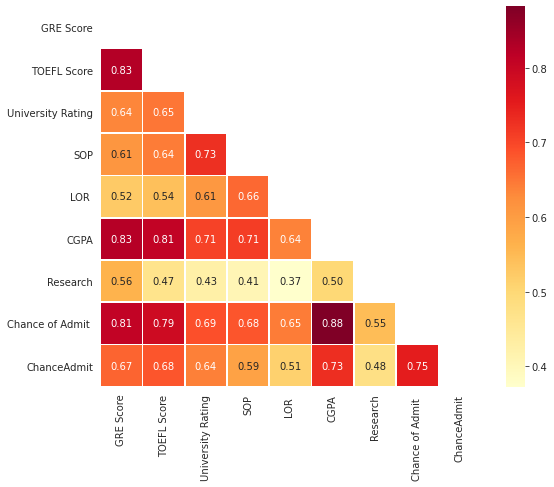

In [26]:
mask = np.zeros_like(correlation)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(correlation,mask=mask,square=True,annot=True,fmt='0.2f',linewidths=.8,cmap="YlOrRd")


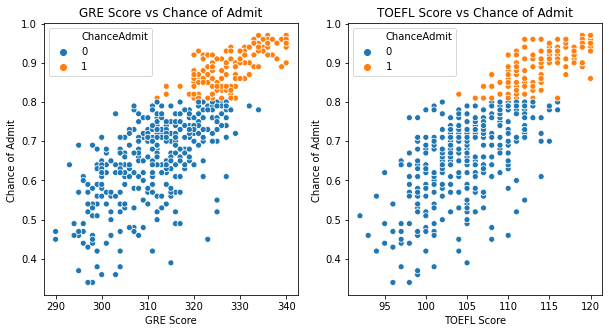

In [8]:

admissions['ChanceAdmit'] = admissions['Chance of Admit '].map(lambda x : 1 if x>0.80 else 0)
fig,ax = plt.subplots(1,2,figsize=(10,5))
sns.scatterplot(admissions['GRE Score'] , admissions['Chance of Admit ']  , hue=admissions['ChanceAdmit'], ax=ax[0])
sns.scatterplot(admissions['TOEFL Score'] , admissions['Chance of Admit '] ,hue=admissions['ChanceAdmit'] , ax=ax[1])
ax[0].set_title('GRE Score vs Chance of Admit')
ax[1].set_title('TOEFL Score vs Chance of Admit')
plt.show()



    There is a clear linear relationship between the GRE & TOEFL scores with the chance of getting admitted ,
    i.e. the more you score in GRE & TOEFL the more is your chance of getting admitted
    We can also see that students who got admitted have a relatively high GRE & TOEFL scores



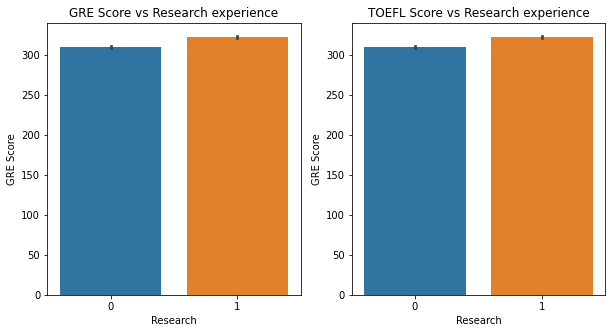

In [9]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
sns.barplot(admissions['Research'] , admissions['GRE Score'] ,ax=ax[0])
sns.barplot(admissions
['Research'] , admissions['GRE Score'] , ax=ax[1])
ax[0].set_title('GRE Score vs Research experience')
ax[1].set_title('TOEFL Score vs Research experience')
plt.show()

Does having Research experience makes you score well in GRE & TOEFL ?

There is no significant difference in the average GRE & TOEFL scores of the students based on whether the have any Research experience or not
We can say that students can score good in GRE & TOEFL even if they dont have any Research experience

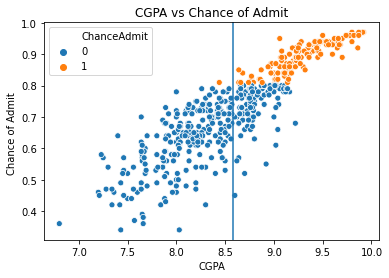

In [10]:
sns.scatterplot(admissions['CGPA'] , admissions['Chance of Admit '] ,hue=admissions['ChanceAdmit'])
plt.axvline(admissions['CGPA'].mean())
plt.title('CGPA vs Chance of Admit')
plt.show()

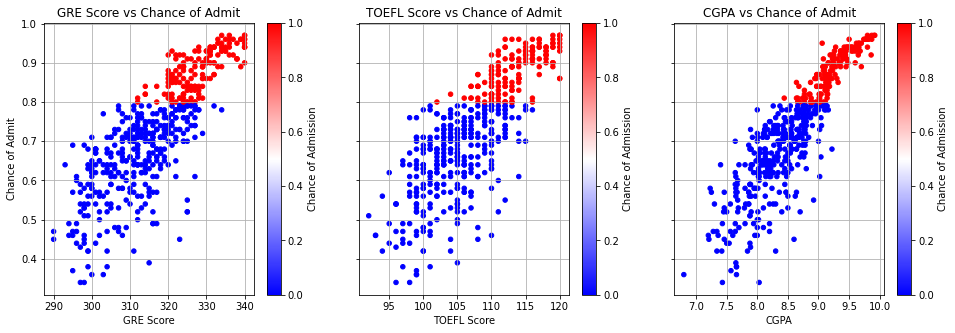

In [30]:
Cutoff = 0.80
admissions = admissions.rename(columns={'Chance of Admit ': "Chance of Admit","LOR ": "LOR"})
admissions['Chance of Admission'] = admissions['Chance of Admit'].map(lambda x : 1 if x >= Cutoff else 0)

fig,ax = plt.subplots(1,3,sharey=True,figsize = (16,5))
admissions.plot(kind = "scatter",x = 'GRE Score' , y = 'Chance of Admit' , c ='Chance of Admission',ax = ax[0],grid = True,cmap = "bwr")
admissions.plot(kind = "scatter",x = 'TOEFL Score' ,y = 'Chance of Admit',c = 'Chance of Admission' ,ax = ax[1],grid = True,cmap = "bwr")
admissions.plot(kind = "scatter",x = 'CGPA' ,y = 'Chance of Admit' ,c = 'Chance of Admission' ,ax = ax[2],grid = True ,cmap = "bwr")
ax[0].set_title('GRE Score vs Chance of Admit')
ax[1].set_title('TOEFL Score vs Chance of Admit')
ax[2].set_title('CGPA vs Chance of Admit')
plt.show()




Above three plots suggest following

    Students having GRE score greater than 310 have high chance of admission
    Students having TOEFL score greater than 110 have high chance of admission
    Students having CGPA greater than 8.5 having higher chance of admission



How does CGPA influence the chane of getting admitted ?



    We can see that CGPA also has a good linear relationship with the change of admitance
    We can say that , to have a good chance of getting admitted you should have a CGPA of more than 8.5

We can notice that there is only 1 student who got admitted whose CGPA was less than the average CGPA of all the students (about 8.6) , let us look at that student's record


In [11]:


admissions[(admissions['CGPA']<8.5) & (admissions['ChanceAdmit']==1)].T



,359
GRE Score,321.00
TOEFL Score,107.00
University Rating,2.00
SOP,2.00
LOR,1.50
CGPA,8.44
Research,0.00
Chance of Admit,0.81
ChanceAdmit,1.00


This student has a GRE & TOEFL score which is less that the average of all the students who got admitted
the SOP and LOR rating is also poor and has no Reasarch experience and still got admitted
(This a case where more scrutiny is required about the admittance of that student)

What is proportion of students based on Research experience and University Rating?

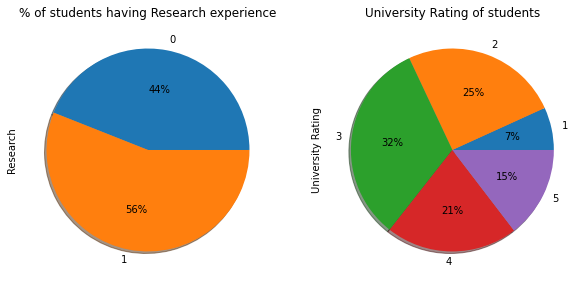

In [12]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
admissions.groupby(['Research'])['Research'].count().plot.pie(autopct='%.f%%' ,ax=ax[0] ,shadow=True )
ax[0].set_title('% of students having Research experience')
admissions.groupby(['University Rating'])['University Rating'].count().plot.pie(autopct='%.f%%' , ax=ax[1],shadow=True)
ax[1].set_title('University Rating of students')
plt.show()



    56% of the students have Research experience
    Only 15% of the students have a University Rating of 5
    64% of the students have a Unversity Rating less than 4



Does having Research experience alone improve my chances of getting admitted ?

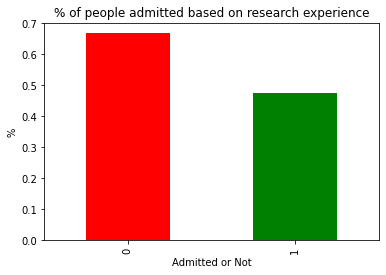

In [13]:
(admissions['ChanceAdmit'][admissions['Research']==1].value_counts().sort_index()/admissions['Research'].value_counts().sort_index()).plot(kind='bar',\
                                                                                                            color=['r','g'])
plt.title('% of people admitted based on research experience')
plt.xlabel('Admitted or Not')
plt.ylabel('%')
plt.show()

Only about 45% of the people who have Research experience got admitted , this shows that having Research experience alone is not enough to get admitted

Does the University Rating influence my SOP and LOR Rating?

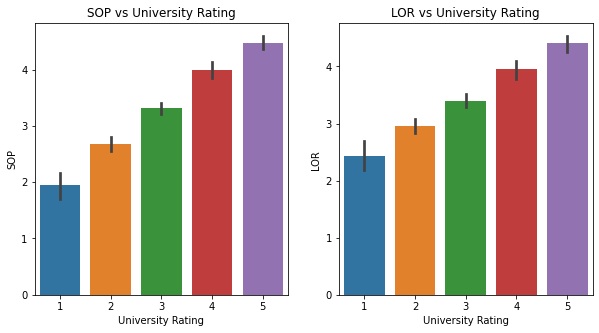

In [15]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
sns.barplot(admissions['University Rating'] , admissions['SOP'] ,ax=ax[0])
sns.barplot(admissions['University Rating'] , admissions['LOR '] , ax=ax[1])
ax[0].set_title('SOP vs University Rating')
ax[1].set_title('LOR vs University Rating')
plt.show()

The more the university rating you have , the more rating your SOP & LOR will get , this is relatable because SOP and LOR are attested by the university in which you studied and hence the University Rating influences the rating of your SOP & LOR

Does CGPA influence my University Rating?

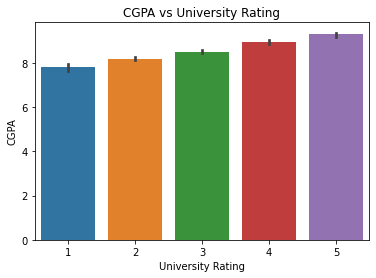

In [16]:
sns.barplot(admissions['University Rating']  , admissions['CGPA'])
plt.title('CGPA vs University Rating')
plt.show()

Students with more that 8.5 CGPA have high University Rating 

 What is the average SOP & LOR Rating of students who got admitted ?



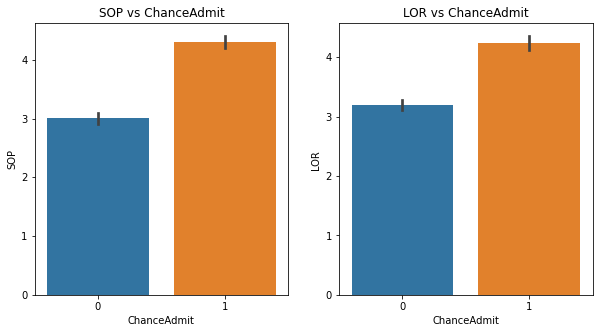

In [17]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
sns.barplot(admissions['ChanceAdmit'] , admissions['SOP'] ,ax=ax[0])
sns.barplot(admissions['ChanceAdmit'] , admissions['LOR '] , ax=ax[1])
ax[0].set_title('SOP vs ChanceAdmit')
ax[1].set_title('LOR vs ChanceAdmit')
plt.show()

People who got admitted have an average SOP & LOR rating more than 4
Which tells us that having a rating of 4 and above for SOP & LOR is very important for getting admitted

How does the University Rating improve the chance of getting admitted ?

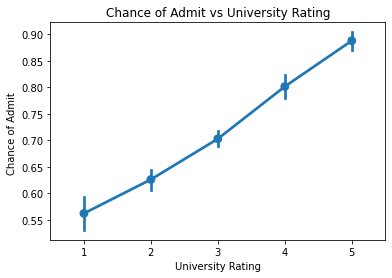

In [18]:
sns.pointplot(admissions['University Rating'] , admissions['Chance of Admit '])
plt.title('Chance of Admit vs University Rating')
plt.show()

A University Rating of 4 and above have a very good chance of admittance

How many students actually got admitted ?

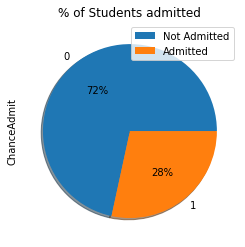

In [19]:
admissions.groupby(['ChanceAdmit'])['ChanceAdmit'].count().plot.pie(autopct='%.f%%' , shadow=True)
plt.title('% of Students admitted')
plt.legend(['Not Admitted','Admitted'])
plt.show()


28% of the Students actually got Admitted 

 Key Insights

    A high score in GRE & TOEFL is very important
        GRE : 320+
        TOEFL : 110+
    A CGPA of more than 8.5 is a must
    Having Research experience is not very important , but having it is an added advantage
    University Rating of 4 and above is very important
    University Rating also influences the Rating of SOP & LOR



Question 2: Does having Research experience makes you score well in GRE & TOEFL ?

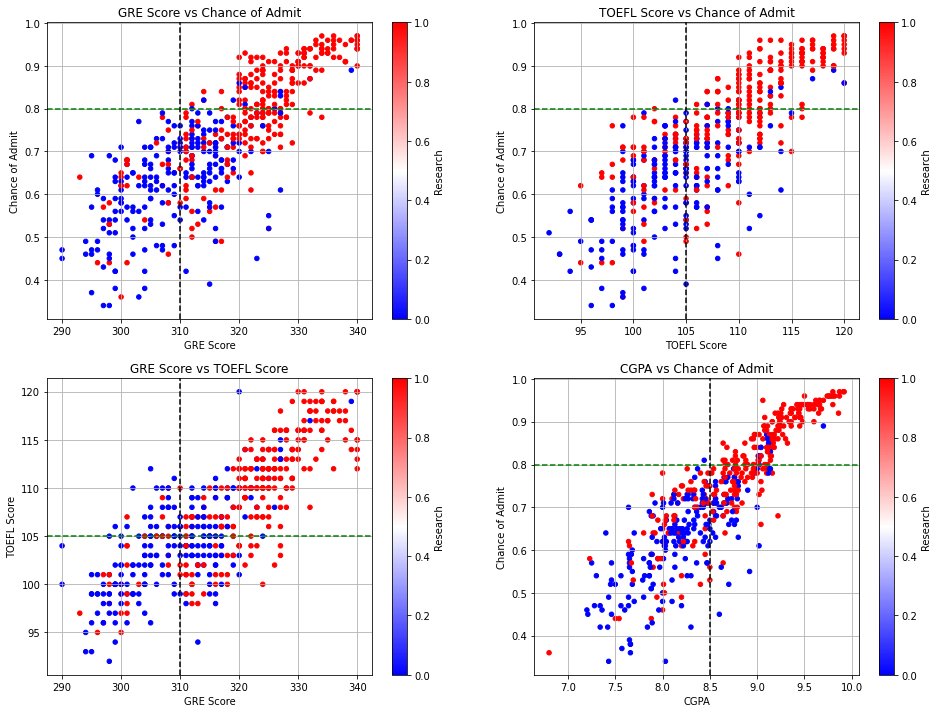

In [31]:
fig,ax = plt.subplots(2,2,sharey=False,figsize = (16,12))
admissions.plot(kind = "scatter",x = 'GRE Score' , y = 'Chance of Admit'  , c ='Research',ax = ax[0,0],grid = True,cmap = "bwr")
admissions.plot(kind = "scatter",x = 'TOEFL Score' ,y = 'Chance of Admit' ,c = 'Research' ,ax = ax[0,1],grid = True,cmap = "bwr")
admissions.plot(kind = "scatter",x = 'GRE Score' ,y = 'TOEFL Score' ,c = 'Research' ,ax = ax[1,0],grid = True ,cmap = "bwr")
admissions.plot(kind = "scatter",x = 'CGPA' ,y = 'Chance of Admit' ,c = 'Research' ,ax = ax[1,1],grid = True ,cmap = "bwr")
ax[0,0].set_title('GRE Score vs Chance of Admit')
ax[0,1].set_title('TOEFL Score vs Chance of Admit')
ax[1,0].set_title('GRE Score vs TOEFL Score')
ax[1,1].set_title('CGPA vs Chance of Admit')
ax[0,0].axhline(Cutoff,color = "green",linestyle='dashed')
ax[0,1].axhline(Cutoff,color = "green",linestyle='dashed')
ax[1,0].axhline(105,color = "green",linestyle='dashed')
ax[1,1].axhline(Cutoff,color = "green",linestyle='dashed')
ax[0,0].axvline(310,color = "black",linestyle='dashed')
ax[0,1].axvline(105,color = "black",linestyle='dashed')
ax[1,0].axvline(310,color = "black",linestyle='dashed')
ax[1,1].axvline(8.5,color = "black",linestyle='dashed')
plt.show()


Above graph have following interpretation

    There are some students who have scored less in GRE and TOEFL despite having research experience although such students are very less(see the percentage in next section)
    From 3rd plot it can be easily interpreted that students who have higher marks tends to have research experience
    There are few who have less CGPA and also having reserach experience



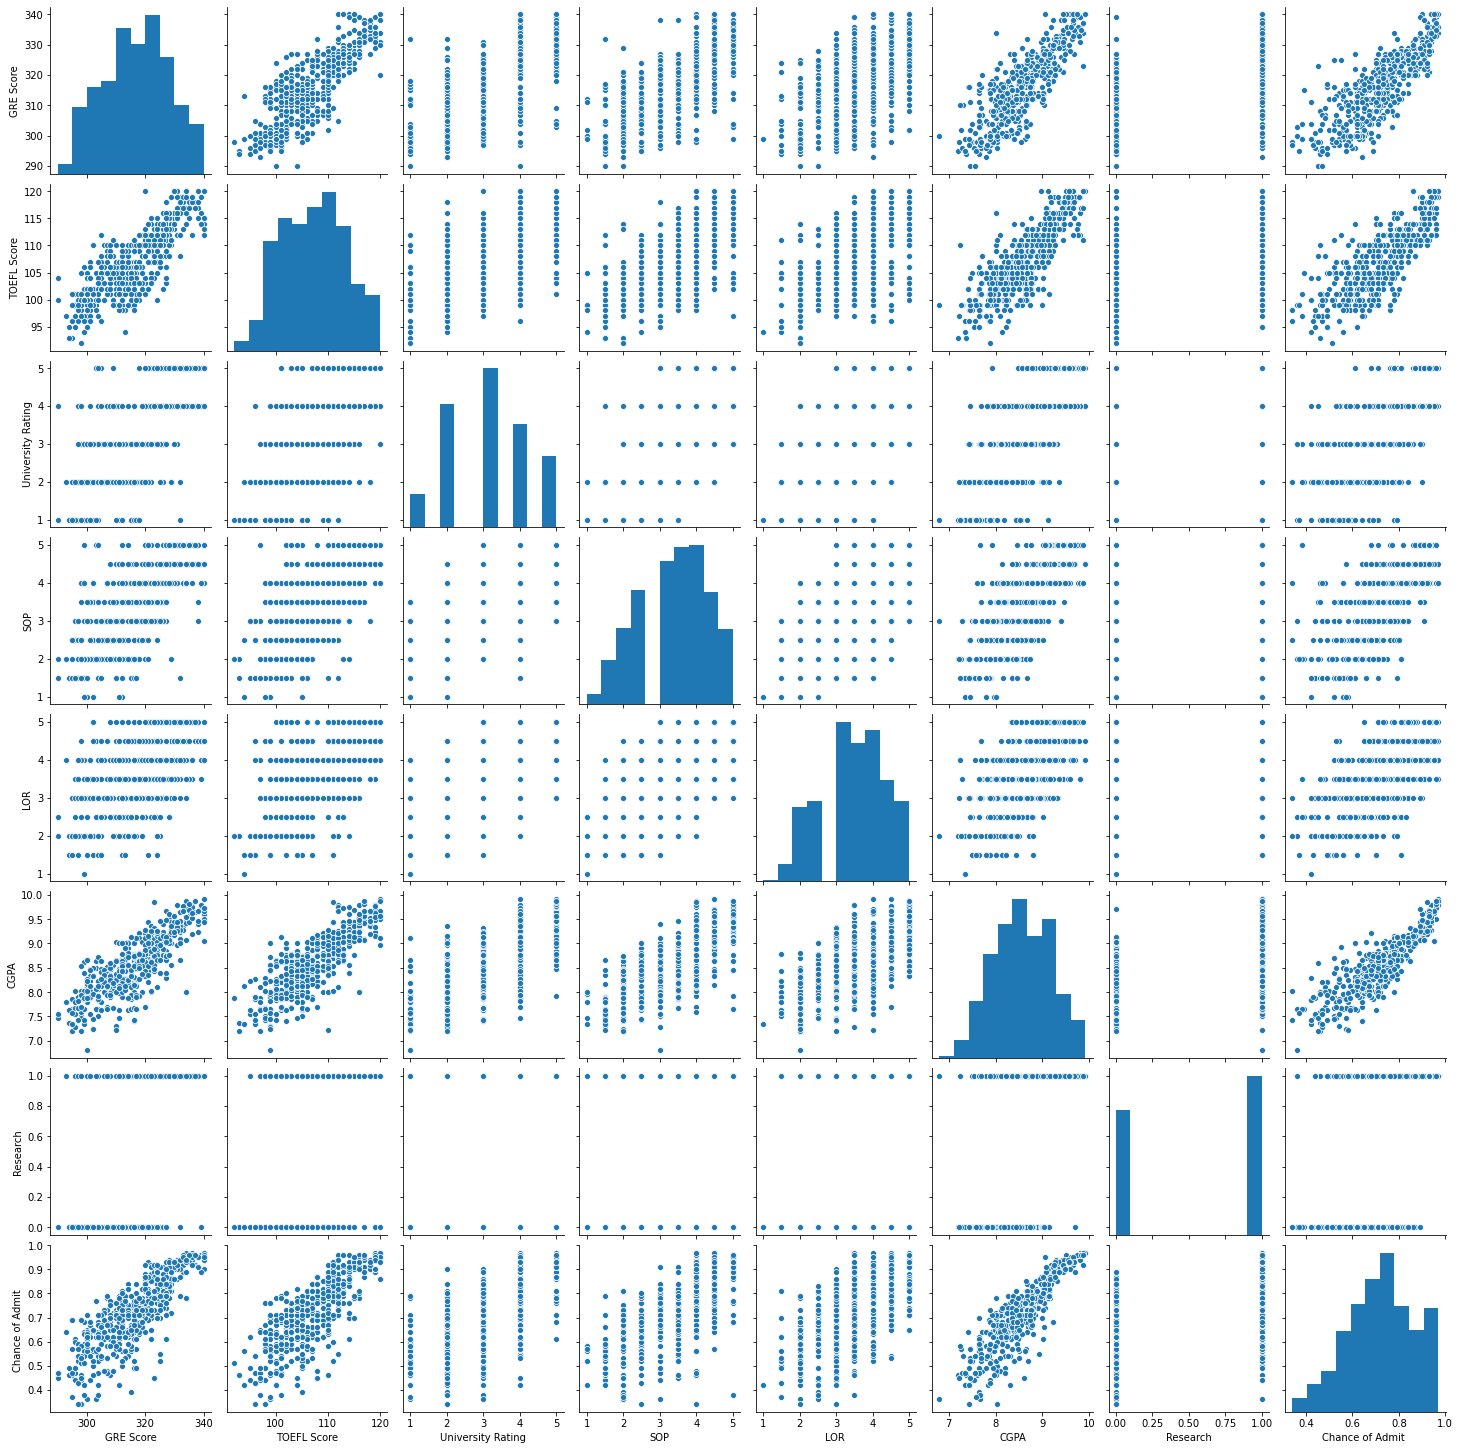

In [0]:
sns.pairplot(admissions)

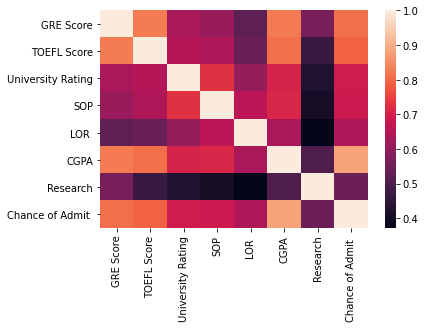

In [0]:
corr = admissions.corr()
sns.heatmap(corr,xticklabels= corr.columns.values,yticklabels=corr.columns.values)

In [0]:
X = admissions.drop('Chance of Admit ',axis =1)
y = admissions['Chance of Admit ']

X_train,X_val,y_train,y_val = train_test_split(X,y,test_size = .25, random_state = 123)

In [0]:
rf_model = RandomForestRegressor(n_estimators = 100,random_state = 42)
rf_model.fit(X_train,y_train)

print('Mean absolute error for RF model: %0.4f' 
      %mean_absolute_error(y_val,rf_model.predict(X_val)))

Mean absolute error for RF model: 0.0421


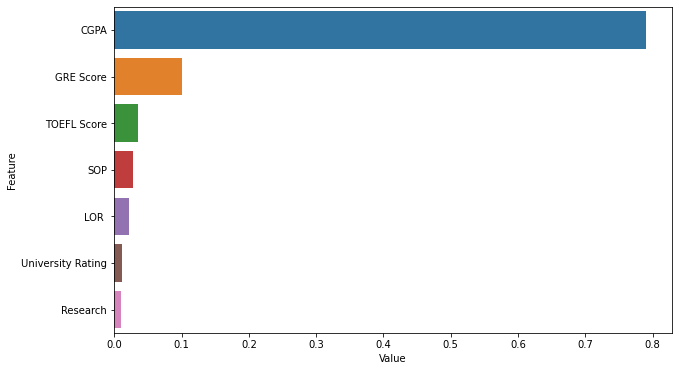

In [0]:
feature_importance = pd.DataFrame(sorted(zip(rf_model.feature_importances_,
                                             X.columns)), columns=['Value','Feature']) 
plt.figure(figsize=(10, 6)) 
sns.barplot(x="Value", y="Feature", 
            data=feature_importance.sort_values(by="Value", ascending=False))